#TP05

In [ ]:
import matplotlib.pyplot as plt


######A way to import file to google collab

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving winequality-white.csv to winequality-white.csv


In [ ]:
import pandas as pd
import io

wine = pd.read_csv(io.BytesIO(uploaded['winequality-white.csv']), sep=';')

In [ ]:
import sklearn
wine = sklearn.utils.shuffle(wine)

In [ ]:
wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3586,5.8,0.28,0.28,4.2,0.044,52.0,158.0,0.9920,3.35,0.44,10.7,7
1976,6.8,0.28,0.37,7.0,0.057,35.0,208.0,0.9973,3.57,0.55,10.2,5


##Exo2

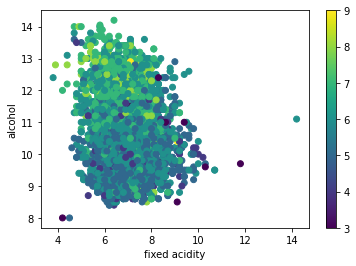

In [ ]:
plt.scatter(wine['fixed acidity'],
            wine['alcohol'],
            c= wine['quality'],
            cmap='viridis')
plt.colorbar()
plt.xlabel("fixed acidity")
plt.ylabel("alcohol")
plt.show()

##Exo3

In [ ]:
x = wine.iloc[:,range(11)]
y = wine.iloc[:,[11]]
X = x.values
Y = y.values

In [ ]:
y.shape

(4898, 10)

In [ ]:
import numpy as np
unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[0.0000e+00 4.4082e+04]
 [1.0000e+00 4.8980e+03]]


In [ ]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
print(y.shape)

(4898, 10)


##Exo4

In [ ]:
from sklearn.model_selection import train_test_split
# create dataset

# split into train test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.10, random_state=1, stratify=y)

In [ ]:
import collections
collections.Counter([y[i][0]for i in range(len(y))])

Counter({0.0: 4898})

##Exo5

In [ ]:
import keras

In [ ]:
# define model
model = keras.Sequential([
    keras.layers.Dense(50, input_dim=11, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

##Exo6

In [ ]:
from tensorflow.keras.optimizers import SGD
# compile model
lrate = 0.005
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate= lrate), metrics=['accuracy'])

##Exo7

In [ ]:
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200,batch_size=20, verbose=2)


Epoch 1/200
221/221 - 1s - loss: 2.1704 - accuracy: 0.2677 - val_loss: 1.9571 - val_accuracy: 0.3816 - 1s/epoch - 5ms/step
Epoch 2/200
221/221 - 0s - loss: 1.7320 - accuracy: 0.4086 - val_loss: 1.5608 - val_accuracy: 0.4367 - 265ms/epoch - 1ms/step
Epoch 3/200
221/221 - 0s - loss: 1.5193 - accuracy: 0.4383 - val_loss: 1.4188 - val_accuracy: 0.4347 - 389ms/epoch - 2ms/step
Epoch 4/200
221/221 - 0s - loss: 1.4114 - accuracy: 0.4469 - val_loss: 1.3538 - val_accuracy: 0.4429 - 389ms/epoch - 2ms/step
Epoch 5/200
221/221 - 0s - loss: 1.3568 - accuracy: 0.4530 - val_loss: 1.3162 - val_accuracy: 0.4449 - 399ms/epoch - 2ms/step
Epoch 6/200
221/221 - 0s - loss: 1.3287 - accuracy: 0.4480 - val_loss: 1.2967 - val_accuracy: 0.4367 - 398ms/epoch - 2ms/step
Epoch 7/200
221/221 - 0s - loss: 1.3123 - accuracy: 0.4494 - val_loss: 1.2807 - val_accuracy: 0.4408 - 347ms/epoch - 2ms/step
Epoch 8/200
221/221 - 0s - loss: 1.2961 - accuracy: 0.4505 - val_loss: 1.2615 - val_accuracy: 0.4408 - 253ms/epoch - 1ms/

##Exo8

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

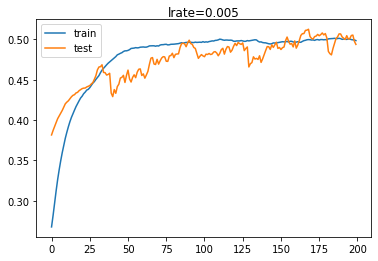

In [ ]:
# plot learning curves
plt.plot(smooth_curve(history.history['accuracy']), label='train')
plt.plot(smooth_curve(history.history['val_accuracy']), label='test')
plt.title('lrate='+str(lrate), pad=-50)
plt.legend()


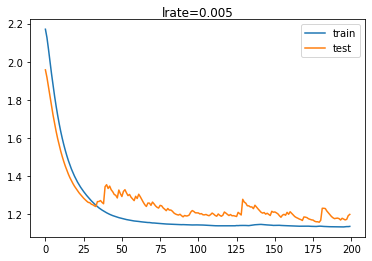

In [ ]:
# plot learning curves
plt.plot(smooth_curve(history.history['loss']), label='train')
plt.plot(smooth_curve(history.history['val_loss']), label='test')
plt.title('lrate='+str(lrate), pad=-50)
plt.legend()

In [ ]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Epoch 1: val_accuracy improved from -inf to 0.34694, saving model to best_model.h5

Epoch 2: val_accuracy improved from 0.34694 to 0.43265, saving model to best_model.h5

Epoch 3: val_accuracy improved from 0.43265 to 0.45102, saving model to best_model.h5

Epoch 4: val_accuracy did not improve from 0.45102

Epoch 5: val_accuracy did not improve from 0.45102

Epoch 6: val_accuracy improved from 0.45102 to 0.45510, saving model to best_model.h5

Epoch 7: val_accuracy improved from 0.45510 to 0.46735, saving model to best_model.h5

Epoch 8: val_accuracy improved from 0.46735 to 0.47143, saving model to best_model.h5

Epoch 9: val_accuracy did not improve from 0.47143

Epoch 10: val_accuracy did not improve from 0.47143

Epoch 11: val_accuracy improved from 0.47143 to 0.48163, saving model to best_model.h5

Epoch 12: val_accuracy did not improve from 0.48163

Epoch 13: val_accuracy did not improve from 0.48163

Epoch 14: val_accuracy did not improve from 0.48163

Epoch 15: val_accuracy i

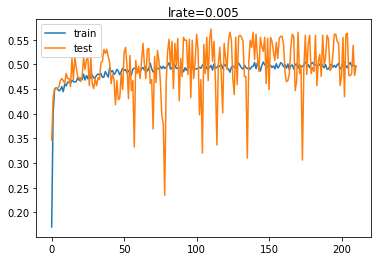

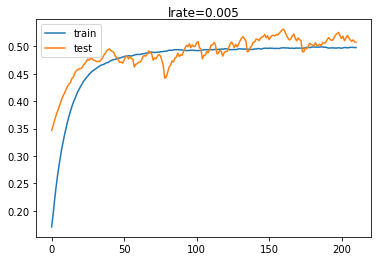

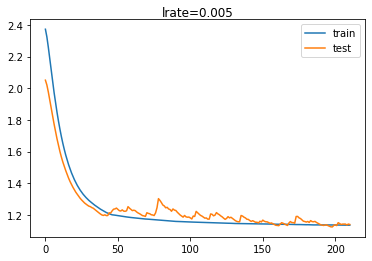

In [ ]:
# define model
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping  
from keras.models import load_model
from keras.layers import BatchNormalization 
model = keras.Sequential([
    keras.layers.Dense(40, input_dim=11, activation='relu', kernel_initializer='he_uniform'),BatchNormalization(),
    #keras.layers.Dense(6, input_dim=11, activation='relu', kernel_initializer='he_uniform'),BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])
es = EarlyStopping(monitor='val_accuracy', mode='auto', verbose=0,patience=100)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
lrate = 0.005
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate= lrate), metrics=['accuracy'])
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=1800, verbose=0,callbacks=[es, mc])
saved_model = load_model('best_model.h5')
# plot learning curves
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('lrate='+str(lrate), pad=-50)
plt.legend()
plt.show()
####################################
plt.plot(smooth_curve(history.history['accuracy']), label='train')
plt.plot(smooth_curve(history.history['val_accuracy']), label='test')
plt.title('lrate='+str(lrate), pad=-50)
plt.legend()
plt.show()
#####################
plt.plot(smooth_curve(history.history['loss']), label='train')
plt.plot(smooth_curve(history.history['val_loss']), label='test')
plt.title('lrate='+str(lrate), pad=-50)
plt.legend()
plt.show()

In [ ]:
_, train_acc = saved_model.evaluate(trainX, trainy, verbose=0)
_, test_acc = saved_model.evaluate(testX, testy, verbose=0)
print('Train: %.4f, Test: %.4f' % (train_acc, test_acc))

Train: 0.5027, Test: 0.5714


In [ ]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, lrate):
  # define model
  model = keras.Sequential([
                            keras.layers.Dense(50, input_dim=11, activation='relu', kernel_initializer='he_uniform'),BatchNormalization(),
                            keras.layers.Dense(10, activation='softmax')
                            ])
  # compile model
  model.compile(loss='categorical_crossentropy', optimizer= keras.optimizers.SGD(learning_rate= lrate), metrics=['accuracy'])
  # fit model
  history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
  # plot learning curves
#  plt.plot(smooth_curve(history.history['accuracy']), label='train')
#  plt.plot(smooth_curve(history.history['val_accuracy']), label='test')
 # plt.title('lrate='+str(lrate), pad=-50)
 # plt.show()
  plt.plot(smooth_curve(history.history['loss']), label='train')
  plt.plot(smooth_curve(history.history['val_loss']), label='test')
  plt.title('lrate='+str(lrate), pad=-50)


##Exo9?

In [ ]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, lrate):
  # define model
  model = keras.Sequential([
                            keras.layers.Dense(50, input_dim=11, activation='relu', kernel_initializer='he_uniform'),BatchNormalization(),
                            keras.layers.Dense(10, activation='softmax')
                            ])
  # compile model
  model.compile(loss='categorical_crossentropy', optimizer= keras.optimizers.SGD(learning_rate= lrate), metrics=['accuracy'])
  # fit model
  history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
  # plot learning curves
#  plt.plot(smooth_curve(history.history['accuracy']), label='train')
#  plt.plot(smooth_curve(history.history['val_accuracy']), label='test')
 # plt.title('lrate='+str(lrate), pad=-50)
 # plt.show()
  plt.plot(smooth_curve(history.history['loss']), label='train')
  plt.plot(smooth_curve(history.history['val_loss']), label='test')
  plt.title('lrate='+str(lrate), pad=-50)

##Exo10

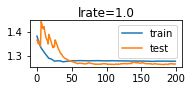

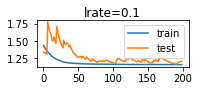

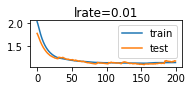

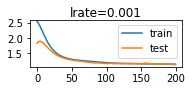

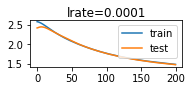

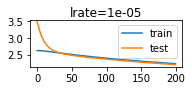

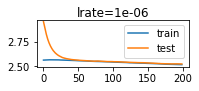

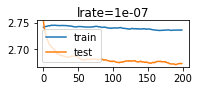

In [ ]:
# create learning curves for different learning rates
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
for i in range(len(learning_rates)):
	# determine the plot number
	plot_no = 420 + (i+1)
	plt.subplot(plot_no)
	# fit model and plot learning curves for a learning rate
	fit_model(trainX, trainy, testX, testy, learning_rates[i])
	# show learning curves
	plt.legend()
	plt.show()


##Exo11

In [ ]:
def fit_model(trainX, trainy, testX, testy, momentum):
  # define model
  model = keras.Sequential([
                            keras.layers.Dense(50, input_dim=11, activation='relu', kernel_initializer='he_uniform'),BatchNormalization(),
                            keras.layers.Dense(10, activation='softmax')
                            ])
  # compile model
  model.compile(loss='categorical_crossentropy', optimizer= keras.optimizers.SGD(learning_rate= 0.0001, momentum= momentum), metrics=['accuracy'])
  # fit model
  history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
  # plot learning curves
  plt.plot(smooth_curve(history.history['loss']), label='train')
  plt.plot(smooth_curve(history.history['val_loss']), label='test')
  plt.title('momentum='+str(momentum), pad=-80)


##Exo12

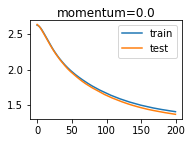

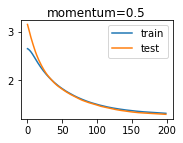

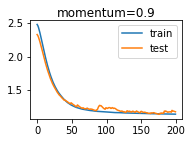

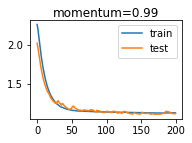

In [ ]:
# create learning curves for different momentums
momentums = [0.0, 0.5, 0.9, 0.99]
for i in range(len(momentums)):
  # determine the plot number
  plot_no = 220 + (i+1)
  plt.subplot(plot_no)
  # fit model and plot learning curves for a momentum
  fit_model(trainX, trainy, testX, testy, momentums[i])
  # show learning curves
  plt.legend()
  plt.show()


In [ ]:
# learning rate decay
def decay_lrate(initial_lrate, decay, iteration):
	return initial_lrate * (1.0 / (1.0 + decay * iteration))

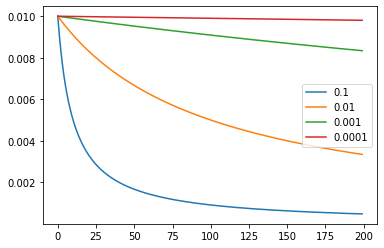

In [ ]:
decays = [1E-1, 1E-2, 1E-3, 1E-4]
lrate = 0.01
n_updates = 200
for decay in decays:
	# calculate learning rates for updates
	lrates = [decay_lrate(lrate, decay, i) for i in range(n_updates)]
	# plot result
	plt.plot(lrates, label=str(decay))
plt.legend()
plt.show()


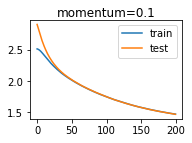

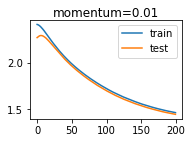

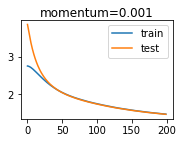

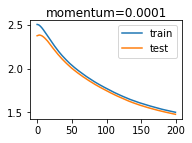

In [ ]:
decay_rates = [1E-1, 1E-2, 1E-3, 1E-4]
for i in range(len(decay_rates)):
  # determine the plot number
  plot_no = 220 + (i+1)
  plt.subplot(plot_no)
  # fit model and plot learning curves for a decay rate
  fit_model(trainX, trainy, testX, testy, decay_rates[i])
  # show learning curves
  plt.legend()
  plt.show()